
Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



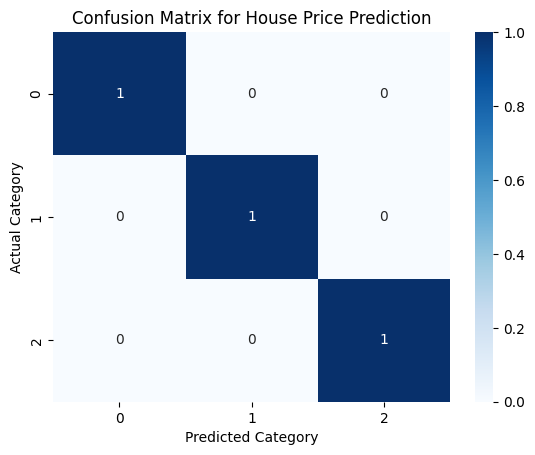


--- Predicted House Prices for New Data ---

   Area  Bedrooms  Bathrooms  Stories  Parking  Furnishing Predicted_Category  \
0  1600         3          2        2        1           1             Medium   
1  1000         2          1        1        0           2                Low   
2  2100         3          3        2        2           0               High   
3   950         1          1        1        0           2                Low   
4  1750         3          2        2        1           0               High   
5  1300         2          2        2        1           1             Medium   
6  2400         4          3        2        2           0               High   
7   850         1          1        1        0           2                Low   
8  1900         3          2        2        1           0               High   
9  1200         2          1        1        1           1             Medium   

       Approx_Price_Range  
0          ₹50 – 70 Lakhs  
1     

In [ ]:
# ========================================================
# HOUSE PRICE PREDICTION USING PROBABILISTIC REASONING
# (NAIVE BAYES CLASSIFIER)
# ========================================================

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Training Data
train_data = pd.read_csv("house_data.csv")

# Step 3: Encode Categorical Columns
le_furnish = LabelEncoder()
le_price = LabelEncoder()
train_data['Furnishing'] = le_furnish.fit_transform(train_data['Furnishing'])
train_data['Price_Category'] = le_price.fit_transform(train_data['Price_Category'])

# Step 4: Split Features and Target
X = train_data[['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking', 'Furnishing']]
y = train_data['Price_Category']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 6: Train the Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
print("\nModel Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Step 8: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for House Price Prediction")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()

# Step 9: Define Approximate Price Ranges
price_ranges = {
    'Low': '₹20 – 40 Lakhs',
    'Medium': '₹50 – 70 Lakhs',
    'High': '₹80 Lakhs – ₹1.5 Crore'
}

# Step 10: Predict for New Data (test file)
new_data = pd.read_csv("new_houses.csv")
new_data['Furnishing'] = le_furnish.transform(new_data['Furnishing'])
predictions = model.predict(new_data)

# Step 11: Map Back the Labels and Price Ranges
new_data['Predicted_Category'] = le_price.inverse_transform(predictions)
new_data['Approx_Price_Range'] = new_data['Predicted_Category'].map(price_ranges)

# Step 12: Display Final Predicted Results
print("\n--- Predicted House Prices for New Data ---\n")
print(new_data[['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking',
                'Furnishing', 'Predicted_Category', 'Approx_Price_Range']])

# Optional: Save predictions to a new file (for submission proof)
new_data.to_csv("predicted_house_prices.csv", index=False)
print("\nPredictions saved as 'predicted_house_prices.csv'")
